<a href="https://colab.research.google.com/github/mcoto/ie0247/blob/main/IE_0247_Tarea5_I_2023Propiedades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La Transformada Discreta de Fourier


## Propiedades

Se mostrarán algunas de las propiedades que se pueden establecer sobre la DFT:

### Transformada y su inversa.

La señal discreta $x[n]$ puede recuperarse a partir de su DFT $X[\omega] = \text{DFT}_N \{ x[n] \}$ utilizando transformación inversa (IDFT).

\begin{equation}
x(n) = \text{IDFT}_N \left{\text{DFT}_N \{ x[n] \} \derecha}
\fin{equation}

para $n=0,1, \dots, N-1$. 

**Ejemplo 1**

La invertibilidad de la DFT se ilustra en el siguiente ejemplo con una señal rectangular $x(n) = \text{rect}_M[n]$. La señal $x(n)$, su espectro de magnitud $|X[\omega]|$ así como la IDFT del espectro $\text{IDFT} \X[\omega] \}$. 

<ipython-input-34-1457e1285ee2>:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x)
<ipython-input-34-1457e1285ee2>:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(abs(X))
<ipython-input-34-1457e1285ee2>:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_col

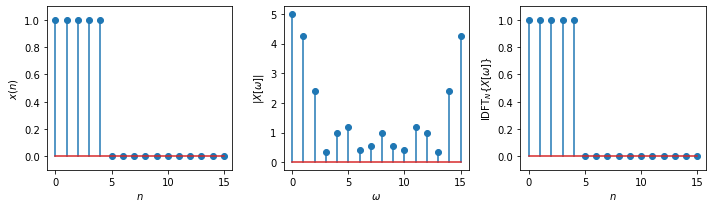

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import dft
%matplotlib inline


def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)


N = 16
M = 5

F = dft(N)
IF = 1/N*np.conjugate(np.transpose(F))
k = np.arange(N)
x = rect(k, M)
X = np.matmul(F, x)
xr = np.matmul(IF, X)

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.stem(x)
plt.xlabel('$n$')
plt.ylabel('$x(n)$')
plt.ylim([-.1, 1.1])

plt.subplot(1, 3, 2)
plt.stem(abs(X))
plt.xlabel('$\omega$')
plt.ylabel('$|X[\omega]|$')

plt.subplot(1, 3, 3)
plt.stem(np.real(xr))
plt.xlabel('$n$')
plt.ylabel(r'$\mathrm{IDFT}_N \{X[\omega]\}$')
plt.ylim([-.1, 1.1])
plt.tight_layout()

#### Transformada de seno y coseno

La DFT de $\cos(\omega_0 k)$ y $\sin(\omega_0 k)$ se obtiene expresando ambas como señales exponenciales complejas:

\begin{align}
\cos(\omega_0 k) &= \frac{1}{2} \left(  e^{-j \omega_0 k} + e^{j \omega_0 k} \right) \\
\sin(\omega_0 k) &= \frac{j}{2} \left( e^{-j \omega_0 k} - e^{j \omega_0 k}  \right)
\end{align}


Para el caso especial de una señal coseno/seno periódica con $\omega_0 = M \frac{2 \pi}{N}$, $M \in \mathbb{Z}$ las DFT se simplifican a

\begin{align}
\text{DFT}_N \{ \cos(\omega_0 k) \} &= \frac{N}{2} \left( \delta[\omega + M - N] + \delta[\mu - M] \right) \\
\text{DFT}_N \{ \sin(\omega_0 k) \} &= \frac{j N}{2} \left( \delta[\omega + M - N] - \delta[\omega - M] \right)
\end{align}


**Ejemplo 2**

La $\text{DFT}_N \{ \cos(\omega_0 k) \}$ se calcula a partir de la definición, y en con el siguiente código se obtiene su espectro.

<ipython-input-35-96c051130501>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(abs(X))


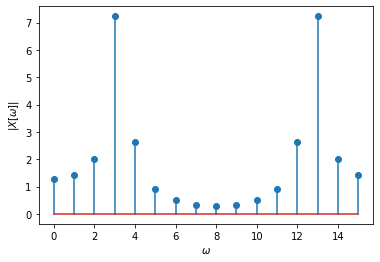

In [ ]:
M = 3.3
N = 16
n = np.arange(N)
W0 = 3.3 * 2*np.pi/N
x = np.cos(W0*n)
F = dft(N)
X = np.matmul(F, x)

plt.stem(abs(X))
plt.xlabel('$\omega$')
plt.ylabel(r'$|X[\omega]|$');

**Copyright**

Este cuaderno ha sido adaptado de:

[Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.